# Imports

## Libraries

In [2]:
### Basic Libraries
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd

### Visualization
# !pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set()
sns.set_theme(context='talk', palette='Dark2')
# !pip install ipywidgets
from tqdm.notebook import tqdm, trange
tqdm.pandas(desc="Progress")
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

### Sklearn
# !pip install scikit-learn
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer #StandardScaler
from sklearn.metrics import confusion_matrix

### Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

### UMAP
# !pip install umap-learn
import umap

### Functions
from utils1 import plot_bar_chart, data_transform
from utils2 import (
    apply_optimal_knnimputer,
    pc_analysis,
    plot_inertia_and_silhouette,
    plot_r2_hc,
    plot_dendrogram,
    clusters_comparison,
    groupby_mean,
    visualize_dimensionality_reduction,
    cluster_profiles
)

### Warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Path
temp_path = 'temp\\'

### Autoreload
%load_ext autoreload
%autoreload 2

## Data

In [3]:
success = pd.read_csv('data\\success.csv', index_col=0)
success_no = pd.read_csv('data\\success_no.csv', index_col=0)
success_rb = pd.read_csv('data\\success_rb.csv', index_col=0)

insuccess = pd.read_csv('data\\insuccess.csv', index_col=0)
insuccess_no = pd.read_csv('data\\insuccess_no.csv', index_col=0)
insuccess_rb = pd.read_csv('data\\insuccess_rb.csv', index_col=0)

In [4]:
success

,Course area_Art,Course area_Business sciences,Course area_Engineering and related techniques,Course area_Health,Course area_Information and journalism,Course area_Personal services,Course area_Social services,Course area_Teacher training/trainers and education sciences,Course area_Veterinary sciences,Marital status,...,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course
Userid,,,,,,,,,,,,,,,,,,,,,
699,False,False,False,False,False,False,False,False,False,True,...,6.0,11.0,6.0,117.142857,0.0,70.0,6.638542,22.233160,22.374880,True
456,False,False,False,False,False,False,True,False,False,False,...,6.0,15.0,2.0,110.000000,1.0,55.0,-9.080992,1.810133,3.822871,False
647,False,False,False,False,False,False,True,False,False,True,...,6.0,15.0,1.0,100.000000,0.0,67.0,-3.959358,2.143466,-6.177129,False
383,False,False,False,False,False,False,True,False,False,True,...,6.0,12.0,3.0,103.333333,0.0,93.0,-3.959358,-6.523201,-2.843795,False
1217,False,False,False,False,False,False,True,False,False,True,...,6.0,11.0,NaN,120.000000,0.0,43.0,-5.860550,10.143466,13.822871,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,False,False,False,True,False,False,False,False,False,True,...,8.0,14.0,7.0,121.500000,0.0,44.0,-11.291489,20.656294,23.840012,False
2761,False,False,False,True,False,False,False,False,False,True,...,8.0,10.0,NaN,133.062500,0.0,76.0,0.243258,5.818307,9.515718,False
4410,False,True,False,False,False,False,False,False,False,False,...,5.0,6.0,5.0,143.333333,0.0,34.0,-5.195787,49.001552,48.279857,False


In [5]:
insuccess

,Course area_Art,Course area_Business sciences,Course area_Engineering and related techniques,Course area_Health,Course area_Information and journalism,Course area_Personal services,Course area_Social services,Course area_Teacher training/trainers and education sciences,Course area_Veterinary sciences,Marital status,...,N units taken 2nd period,N scored units 2nd period,N units approved 2nd period,Average grade 2nd period,N unscored units 2nd period,Social Popularity,Course application mode entry score difference,Course average grade 1st period difference,Course average grade 2nd period difference,Technological course
Userid,,,,,,,,,,,,,,,,,,,,,
669,False,False,False,True,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,13.0,0.130827,-124.648360,-123.546782,False
3793,False,False,True,False,False,False,False,False,False,True,...,5.0,5.0,0.0,0.0,0.0,62.0,-7.100000,-85.653629,-87.876999,False
3190,True,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,44.0,-29.047183,-20.698177,-20.828855,False
4100,False,False,False,False,False,False,True,False,False,True,...,0.0,0.0,0.0,0.0,0.0,41.0,7.116667,-109.856534,-106.177129,False
2330,True,False,False,False,False,False,False,False,False,False,...,6.0,6.0,0.0,0.0,0.0,52.0,5.568333,-120.815841,-111.959360,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,False,False,False,True,False,False,False,False,False,True,...,8.0,8.0,0.0,0.0,8.0,69.0,-2.656742,-124.648360,-123.546782,False
1517,False,False,False,True,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,62.0,13.243258,-124.648360,-123.546782,False
2822,False,False,False,False,False,False,False,False,True,True,...,5.0,5.0,0.0,0.0,0.0,98.0,-18.760000,-118.593854,-111.608121,False


# Perspectives

In [6]:
# # Demographic Traits
# demographic_cols = [
#     'Marital status', 
#     'Nationality', 
#     'Mother\'s qualification', 
#     'Father\'s qualification', 
#     'Mother\'s occupation', 
#     'Father\'s occupation', 
#     'Gender_Male', 
#     'Age at enrollment', 
#     'International', 
#     'Displaced', 
#     'Special needs',
#     'Social Popularity'
# ]

# # Academic Performance
# performance_cols = [
#     'Previous qualification',
#     'Previous qualification score',
#     'Entry score',
#     'N units credited 1st period',
#     'N units taken 1st period',
#     'N scored units 1st period',
#     'N units approved 1st period',
#     'Average grade 1st period',
#     'N unscored units 1st period',
#     'N units credited 2nd period',
#     'N units taken 2nd period',
#     'N scored units 2nd period',
#     'N units approved 2nd period',
#     'Average grade 2nd period',
#     'N unscored units 2nd period',
#     'Course application mode entry score difference',
#     'Course average grade 1st period difference',
#     'Course average grade 2nd period difference'
# ]

# Financial Traits
financial_cols = [
    'Debtor',
    'Regularized Fees',
    'External Funding',
]

# # Course/Program Details
# course_cols = [
#     'Course area_Art', 
#     'Course area_Business sciences', 
#     'Course area_Engineering and related techniques', 
#     'Course area_Health', 
#     'Course area_Information and journalism', 
#     'Course area_Personal services', 
#     'Course area_Social services', 
#     'Course area_Teacher training/trainers and education sciences', 
#     'Course area_Veterinary sciences', 
#     'Application mode', 
#     'Application order',
#     'Morning shift participation',
#     'Technological course'
# ]

# Clustering

### Insucess

#### No scaling

In [7]:
insuccess_no = insuccess_no[financial_cols]

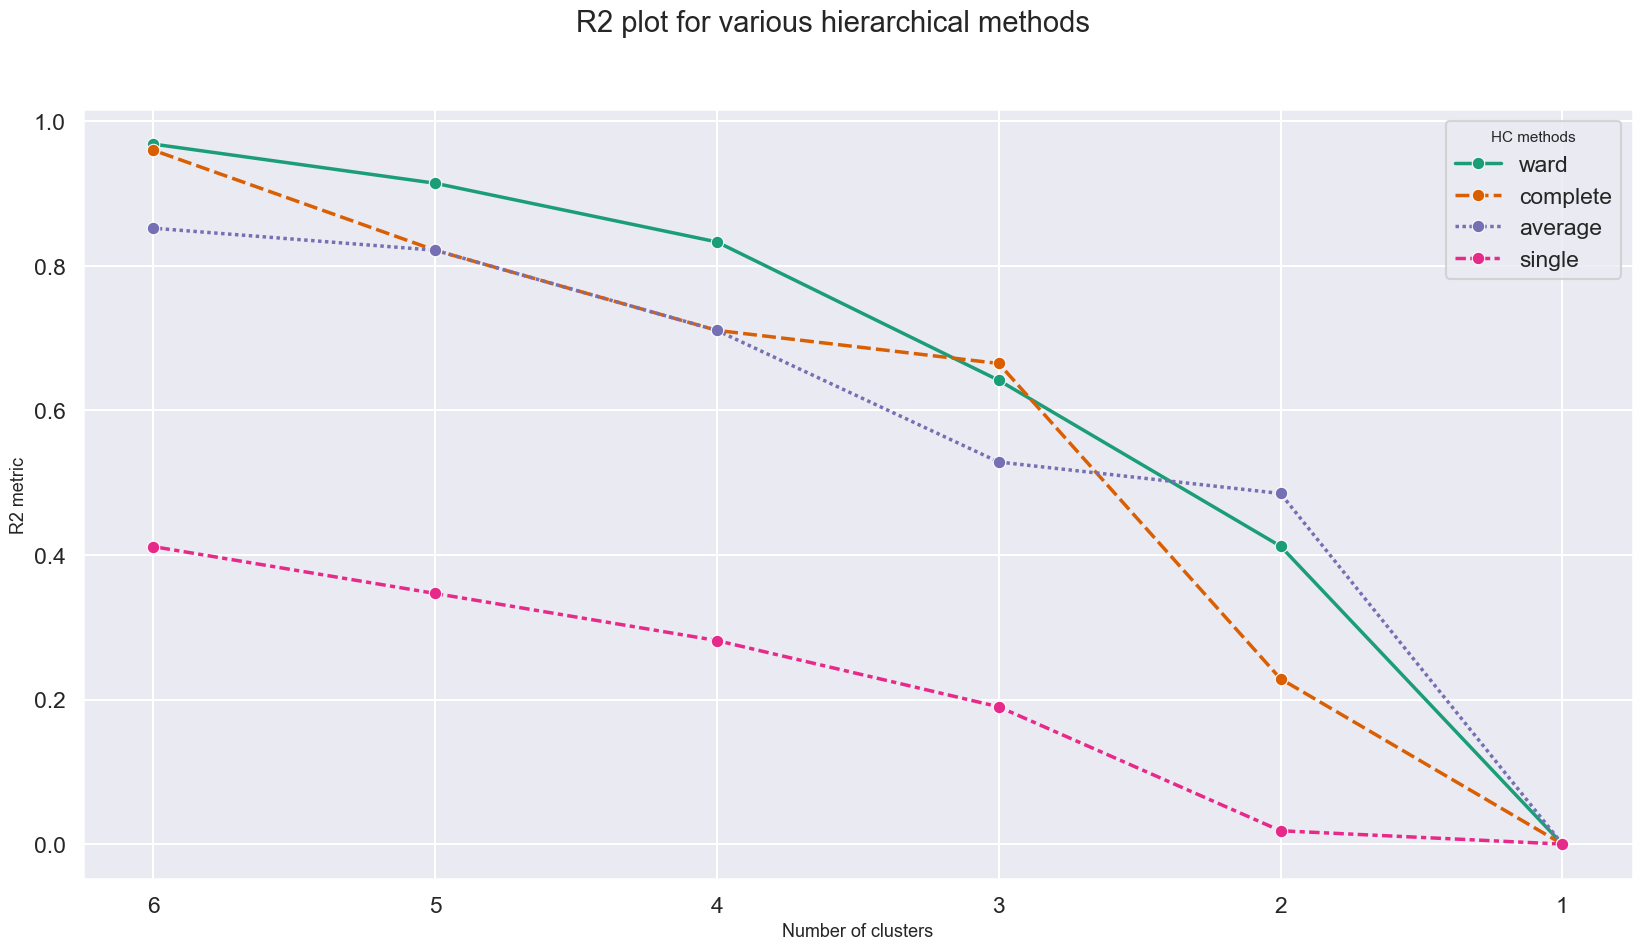

In [8]:
plot_r2_hc(insuccess_no)

##### Complete

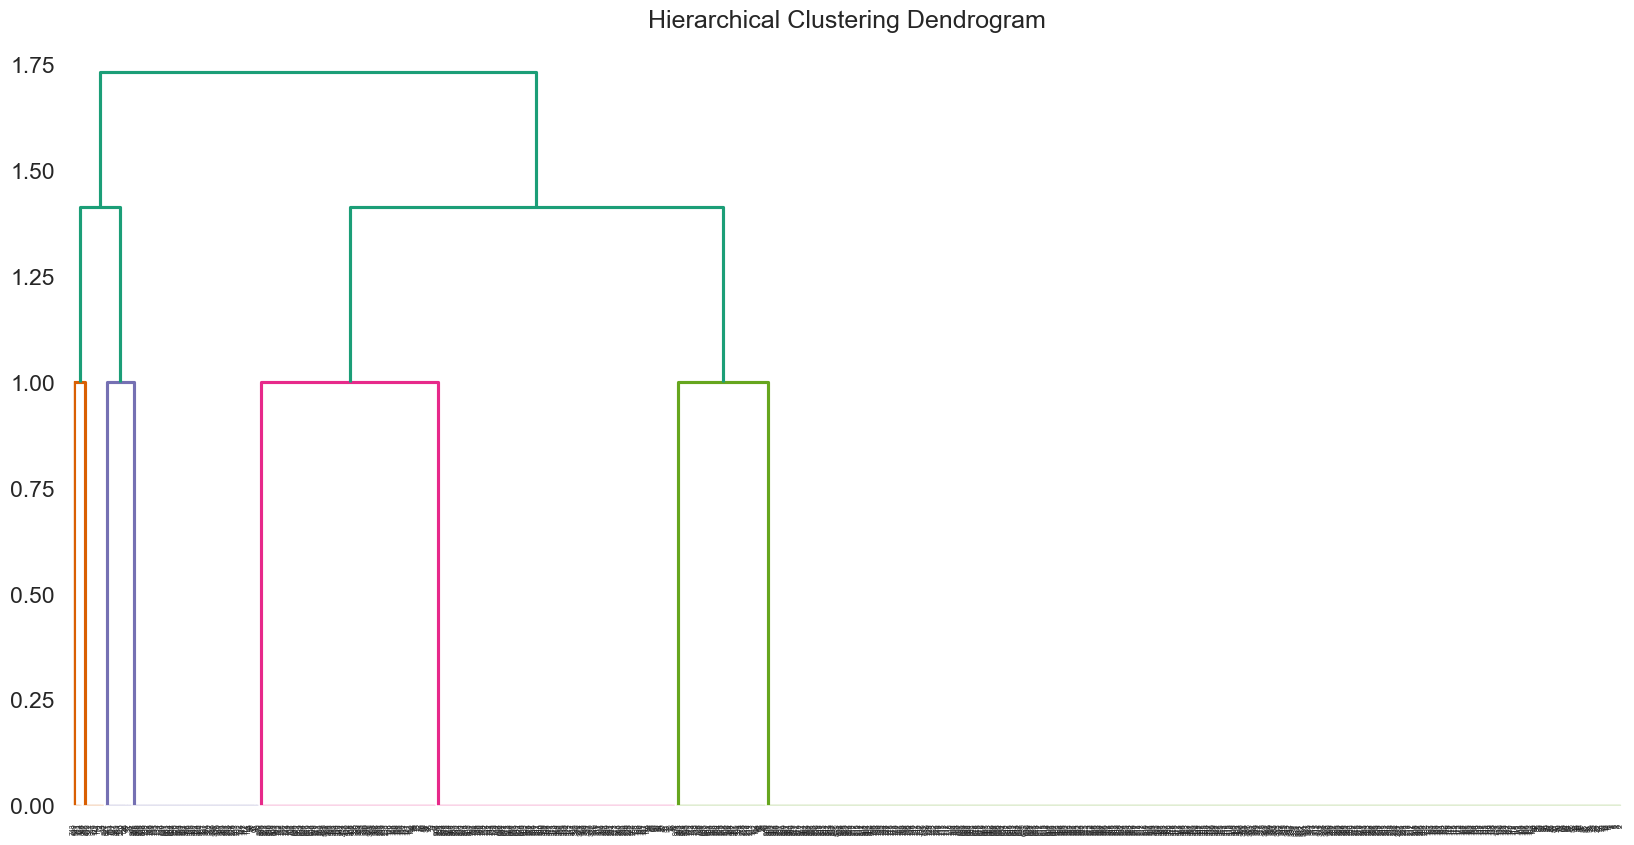

In [9]:
plot_dendrogram(insuccess_no, 'complete')

In [11]:
insuccess['no_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(insuccess_no)

In [12]:
groupby_mean(insuccess, 'no_complete2')

no_complete2,0,1
Course area_Art,0.193267,0.463636
Course area_Business sciences,0.233167,0.090909
Course area_Engineering and related techniques,0.078554,0.045455
Course area_Health,0.097257,0.090909
Course area_Information and journalism,0.058603,0.027273
Course area_Personal services,0.052369,0.054545
Course area_Social services,0.097257,0.063636
Course area_Teacher training/trainers and education sciences,0.027431,0.036364
Course area_Veterinary sciences,0.057357,0.045455
Marital status,0.837905,0.918182


##### Ward

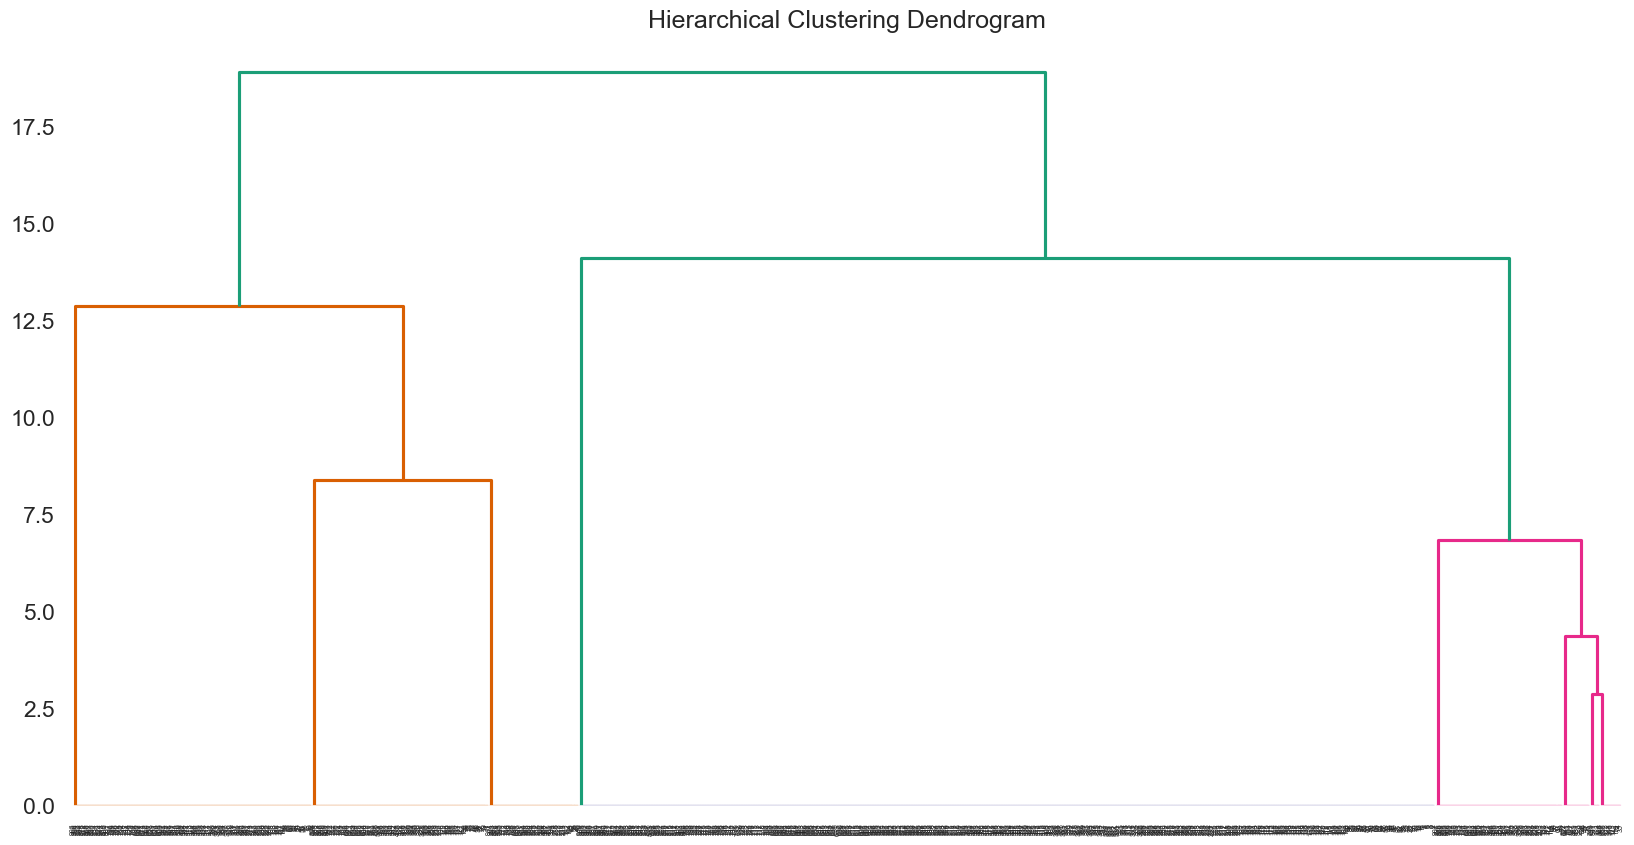

In [13]:
plot_dendrogram(insuccess_no, 'ward')

In [14]:
insuccess['no_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(insuccess_no)

In [15]:
clusters_comparison(insuccess, 'no_complete2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_complete2 0 Cluster,504,298
no_complete2 1 Cluster,110,0


In [16]:
groupby_mean(insuccess, 'no_ward2')

no_ward2,0,1
Course area_Art,0.271987,0.130872
Course area_Business sciences,0.197068,0.255034
Course area_Engineering and related techniques,0.068404,0.087248
Course area_Health,0.105863,0.077181
Course area_Information and journalism,0.047231,0.070470
Course area_Personal services,0.035831,0.087248
Course area_Social services,0.091205,0.097315
Course area_Teacher training/trainers and education sciences,0.027687,0.030201
Course area_Veterinary sciences,0.065147,0.036913
Marital status,0.869707,0.802013


##### Average

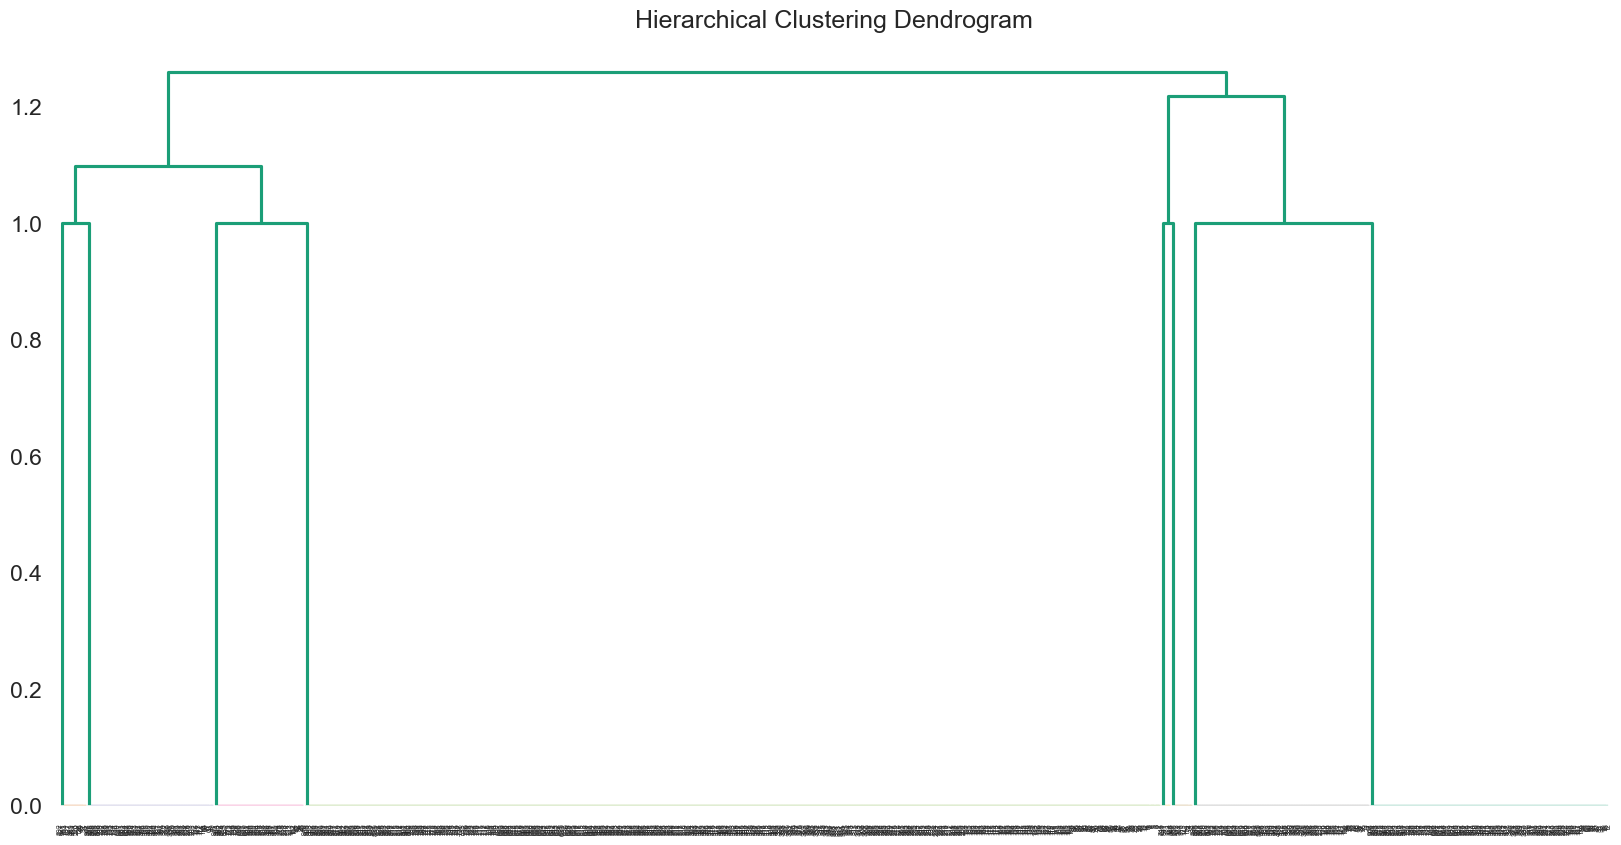

In [17]:
plot_dendrogram(insuccess_no, 'average')

In [18]:
insuccess['no_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(insuccess_no)

In [19]:
clusters_comparison(insuccess, 'no_average2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_average2 0 Cluster,19,245
no_average2 1 Cluster,595,53


In [20]:
groupby_mean(insuccess, 'no_average2')

no_average2,0,1
Course area_Art,0.128788,0.265432
Course area_Business sciences,0.250000,0.202160
Course area_Engineering and related techniques,0.068182,0.077160
Course area_Health,0.068182,0.108025
Course area_Information and journalism,0.079545,0.044753
Course area_Personal services,0.087121,0.038580
Course area_Social services,0.098485,0.091049
Course area_Teacher training/trainers and education sciences,0.030303,0.027778
Course area_Veterinary sciences,0.053030,0.057099
Marital status,0.784091,0.873457


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


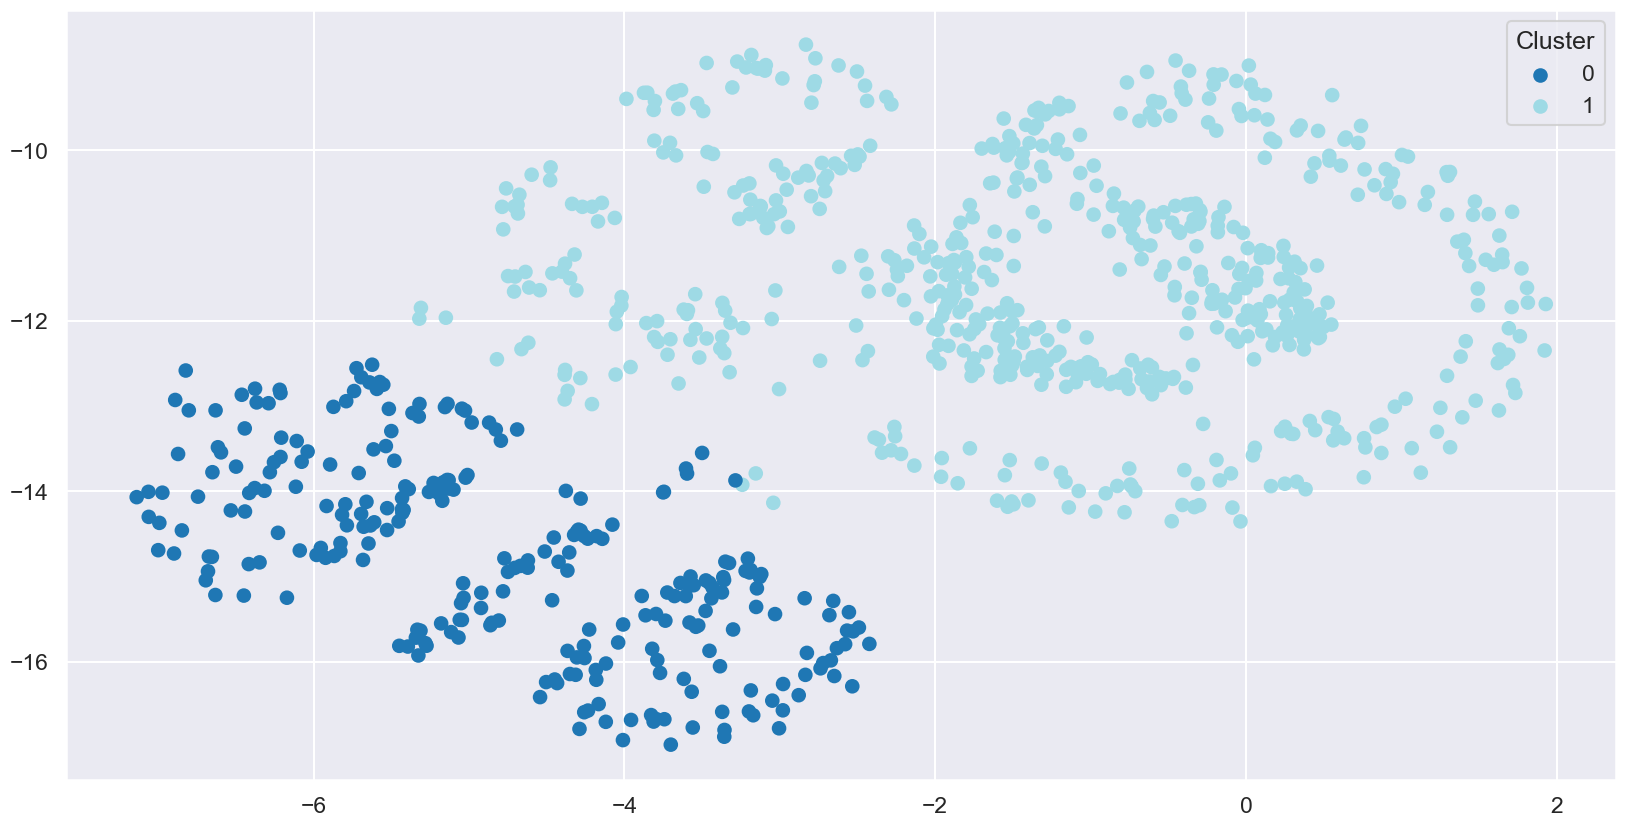

In [43]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(insuccess_no)
visualize_dimensionality_reduction(umap_embedding, insuccess['no_average2'])

#### Robust

In [44]:
insuccess_rb = insuccess_rb[financial_cols]

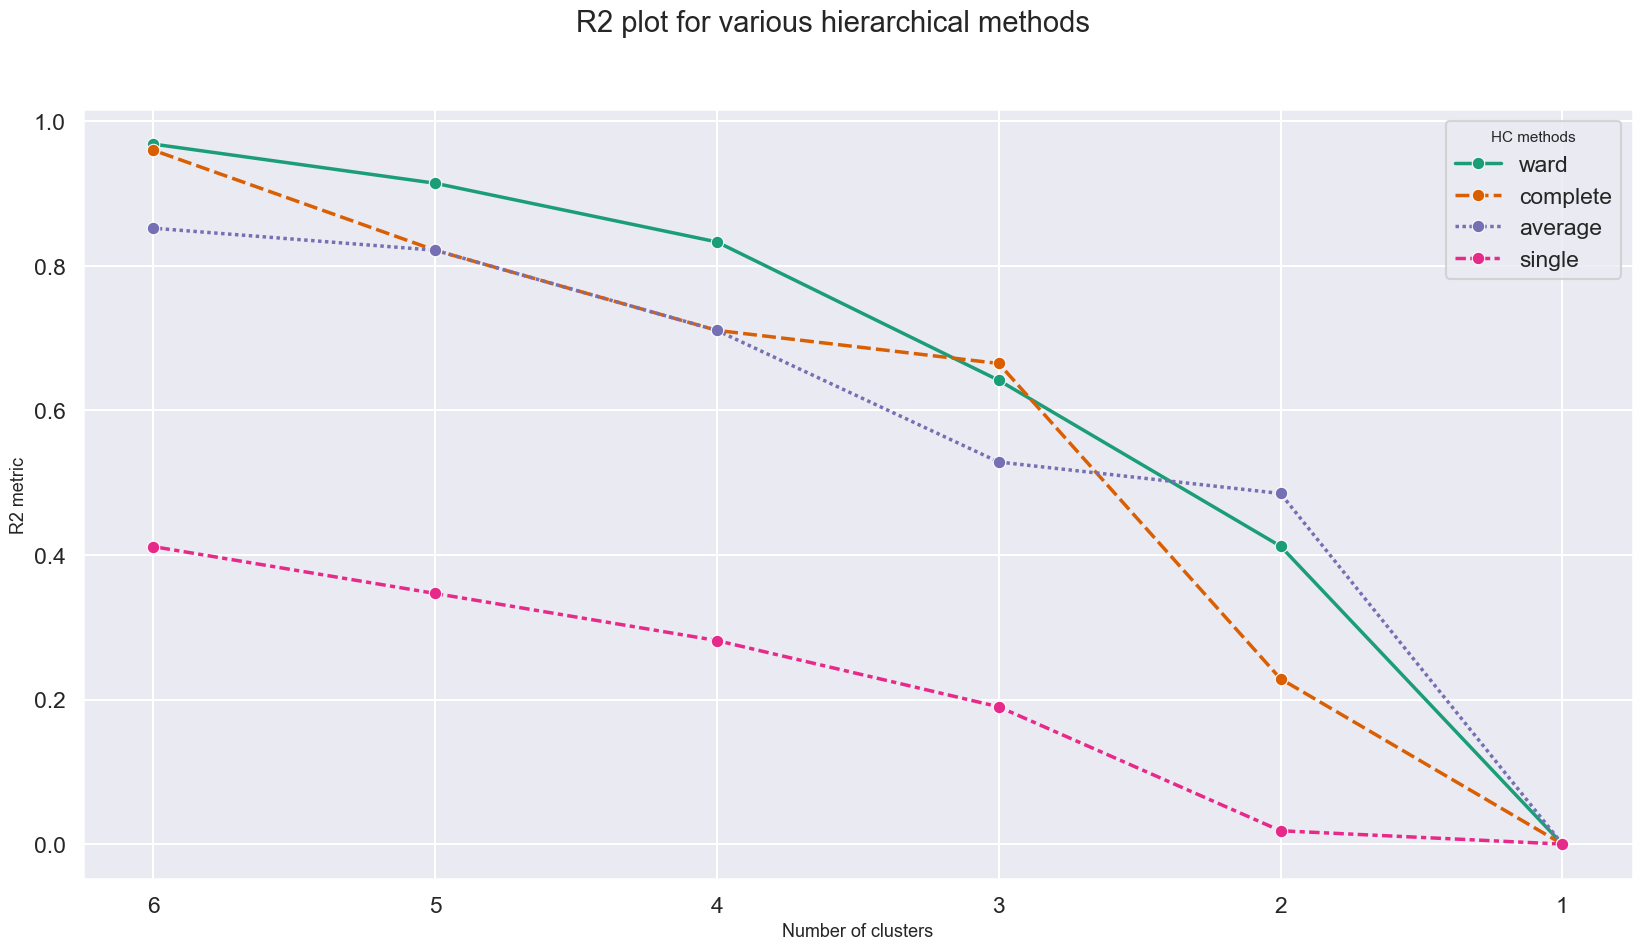

In [45]:
plot_r2_hc(insuccess_rb)

##### Complete

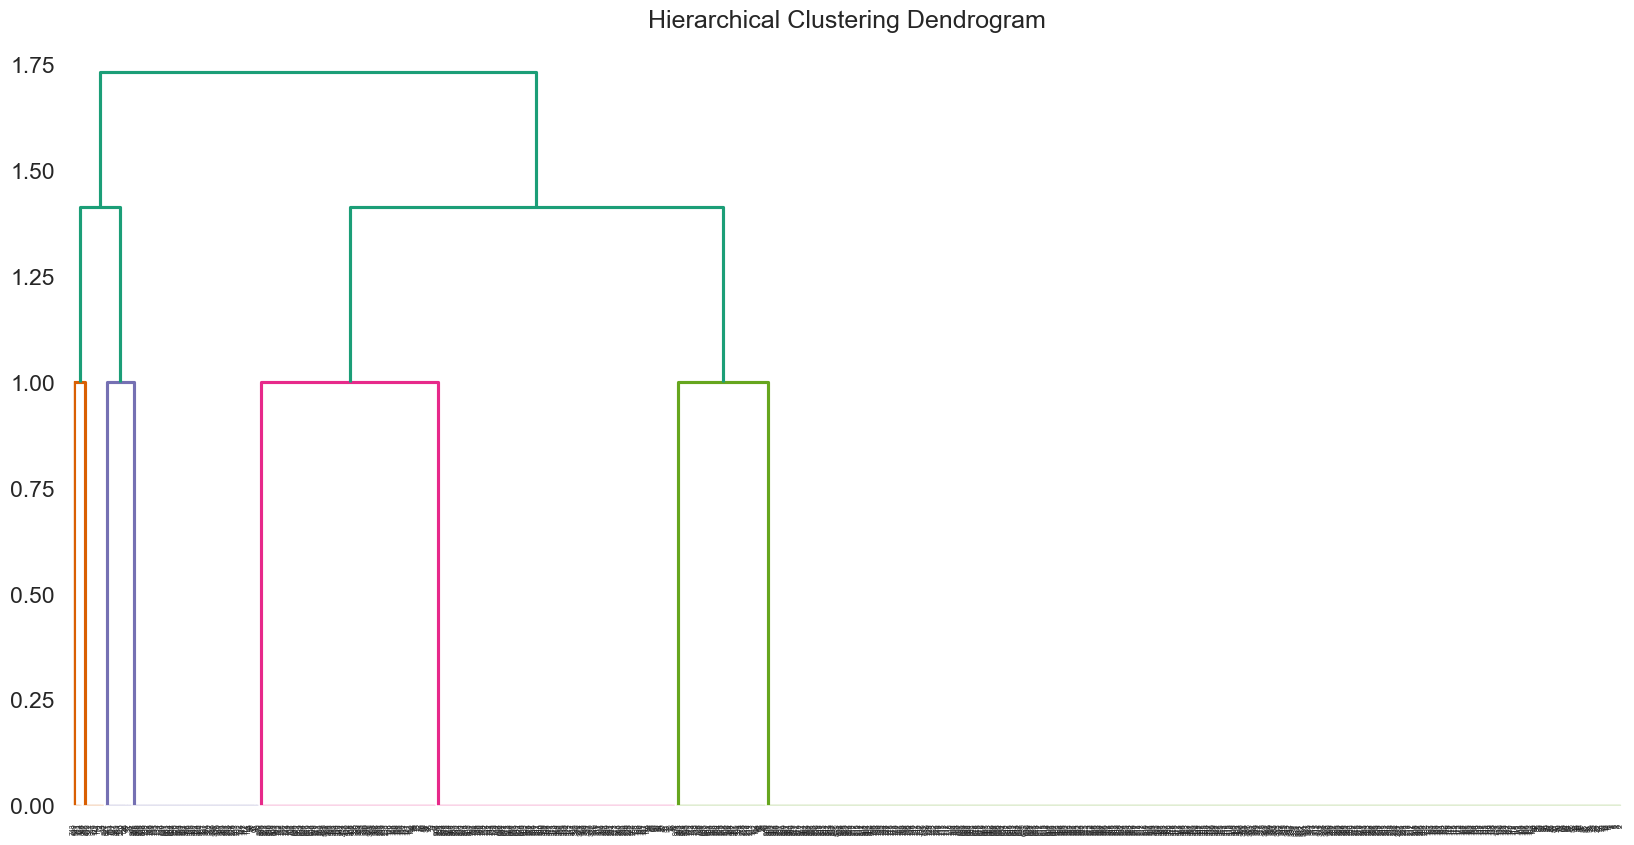

In [46]:
plot_dendrogram(insuccess_rb, 'complete')

In [47]:
insuccess['rb_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(insuccess_rb)

In [50]:
clusters_comparison(insuccess, 'no_complete2', 'rb_complete2')

,rb_complete2 0 Cluster,rb_complete2 1 Cluster
no_complete2 0 Cluster,802,0
no_complete2 1 Cluster,0,110


##### Ward

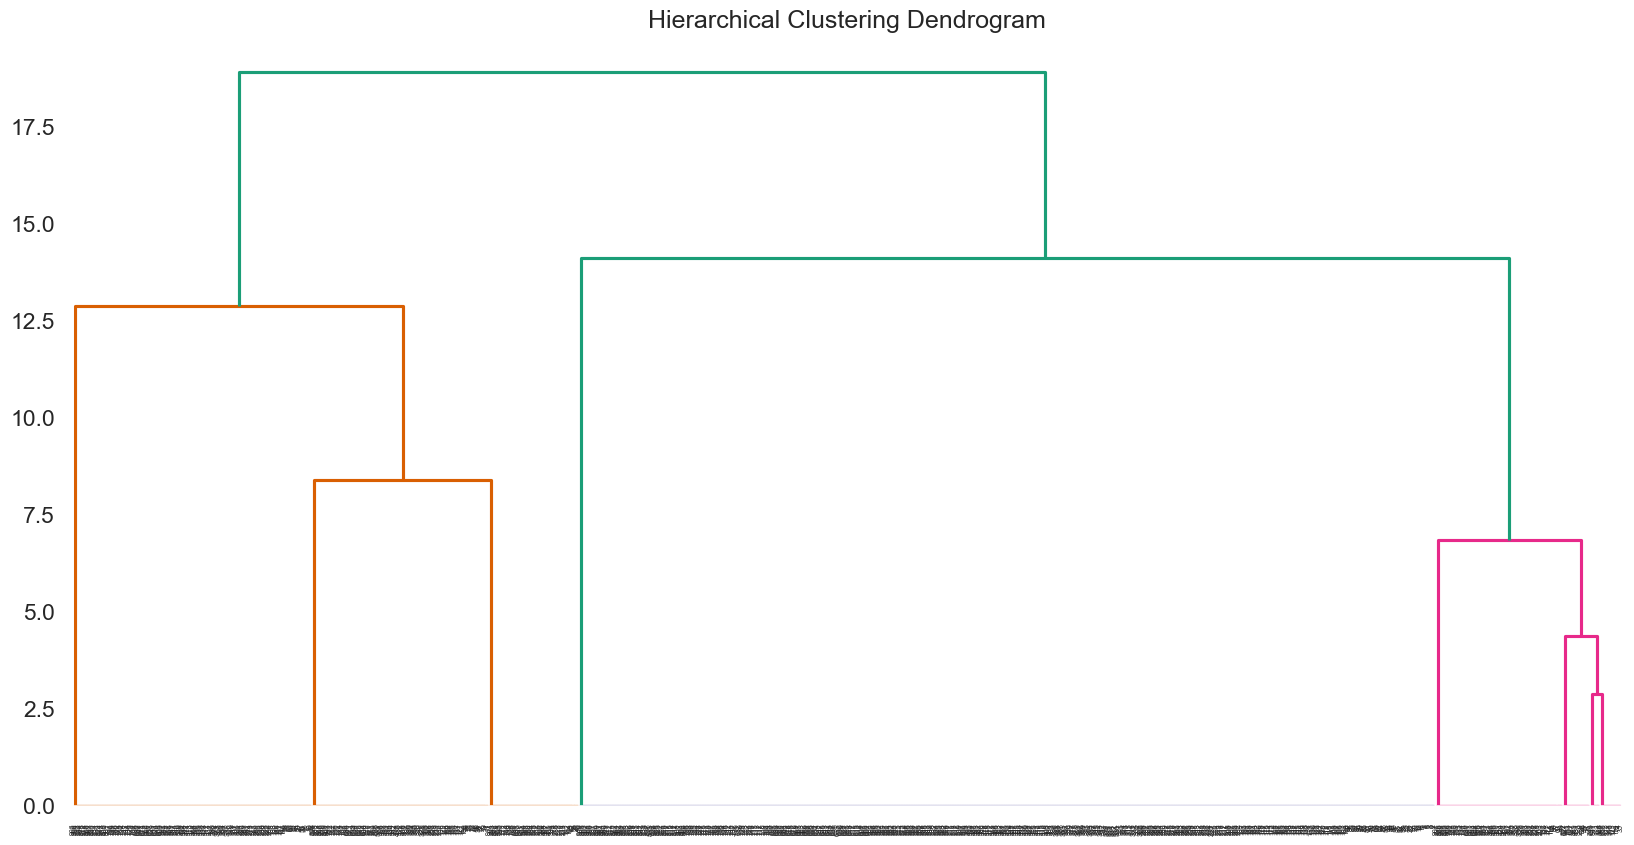

In [51]:
plot_dendrogram(insuccess_rb, 'ward')

In [53]:
insuccess['rb_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(insuccess_rb)

In [54]:
clusters_comparison(insuccess, 'no_ward2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
no_ward2 0 Cluster,614,0
no_ward2 1 Cluster,0,298


##### Average

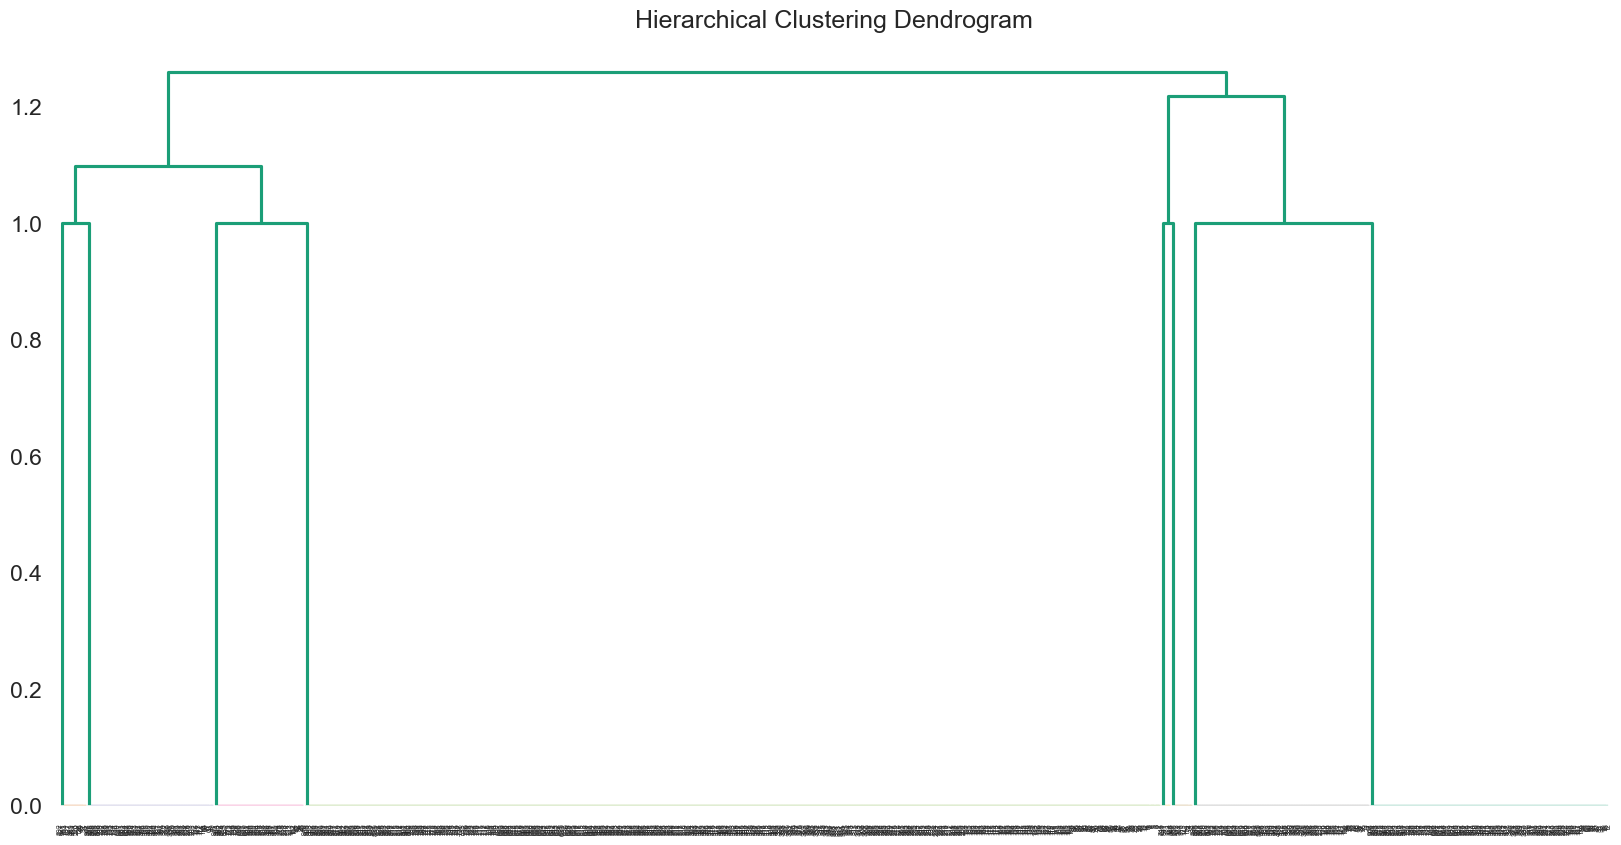

In [52]:
plot_dendrogram(insuccess_rb, 'average')

In [55]:
insuccess['rb_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(insuccess_rb)

In [56]:
clusters_comparison(insuccess, 'no_average2', 'rb_average2')

,rb_average2 0 Cluster,rb_average2 1 Cluster
no_average2 0 Cluster,264,0
no_average2 1 Cluster,0,648


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


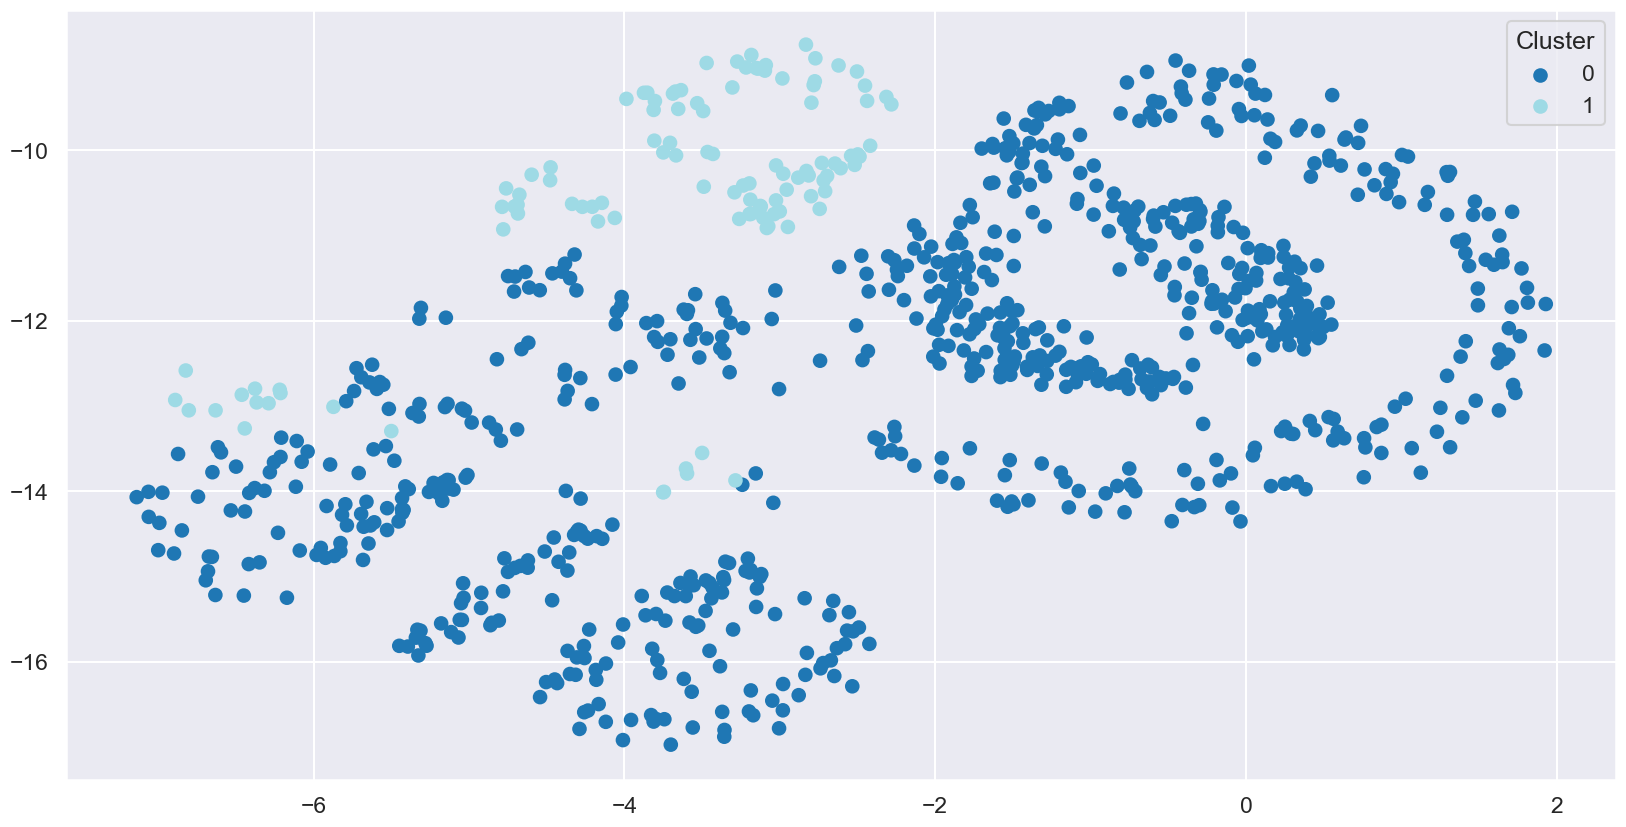

In [57]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(insuccess_rb)
visualize_dimensionality_reduction(umap_embedding, insuccess['rb_complete2'])

### Success

#### No scaling

In [58]:
success_no = success_no[financial_cols]

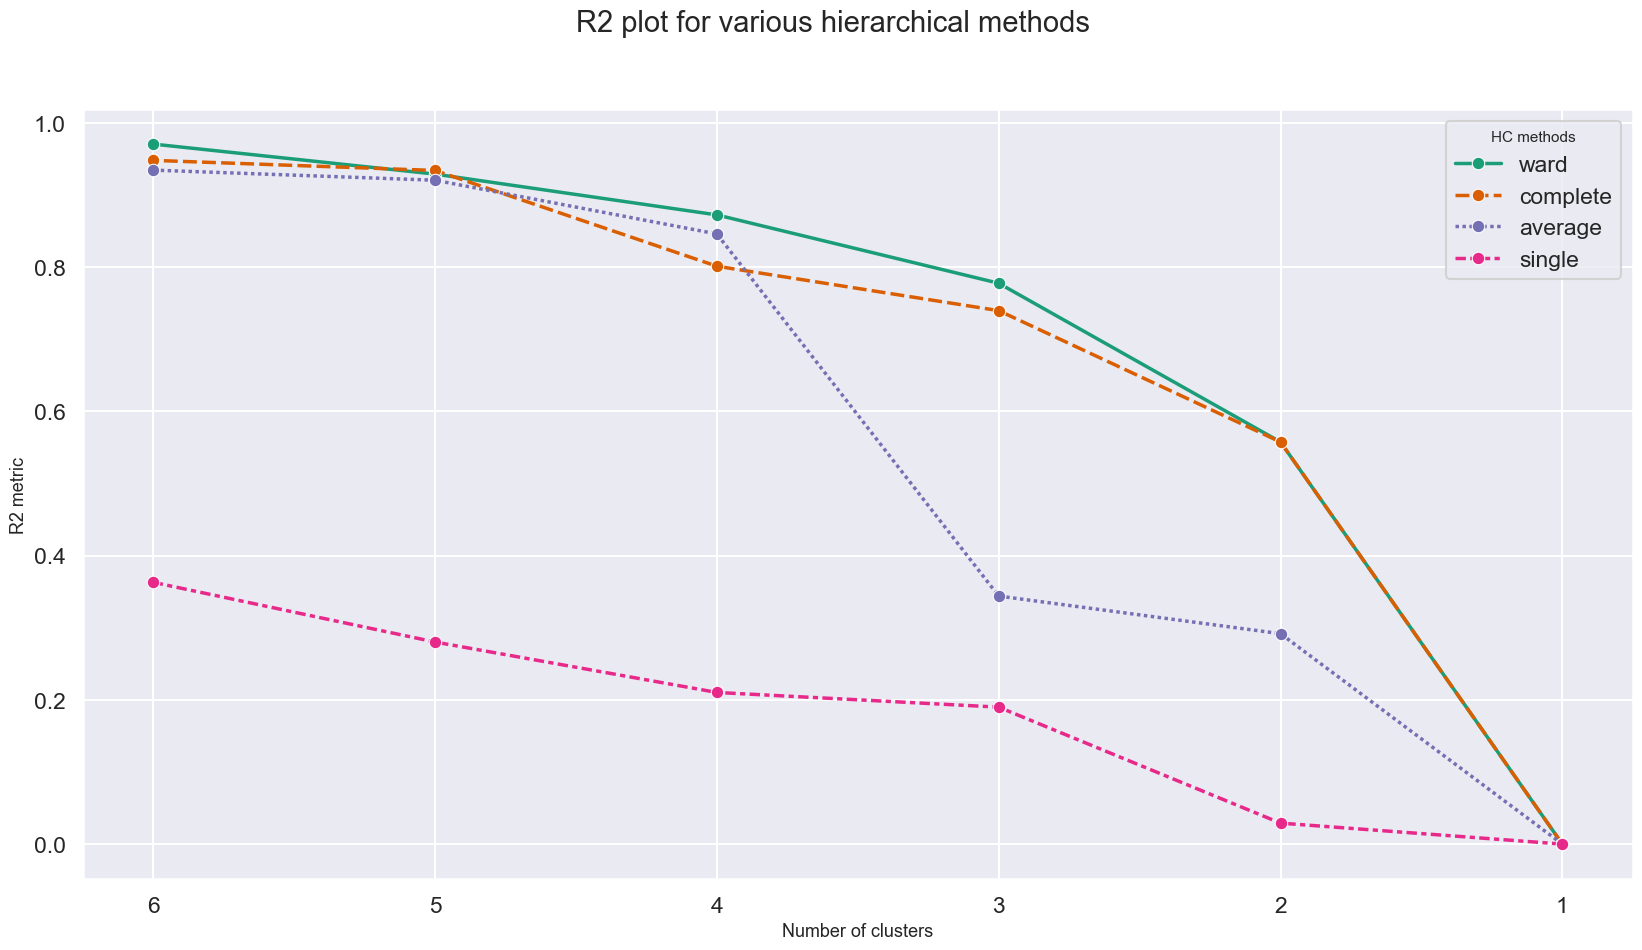

In [59]:
plot_r2_hc(success_no)

##### Complete

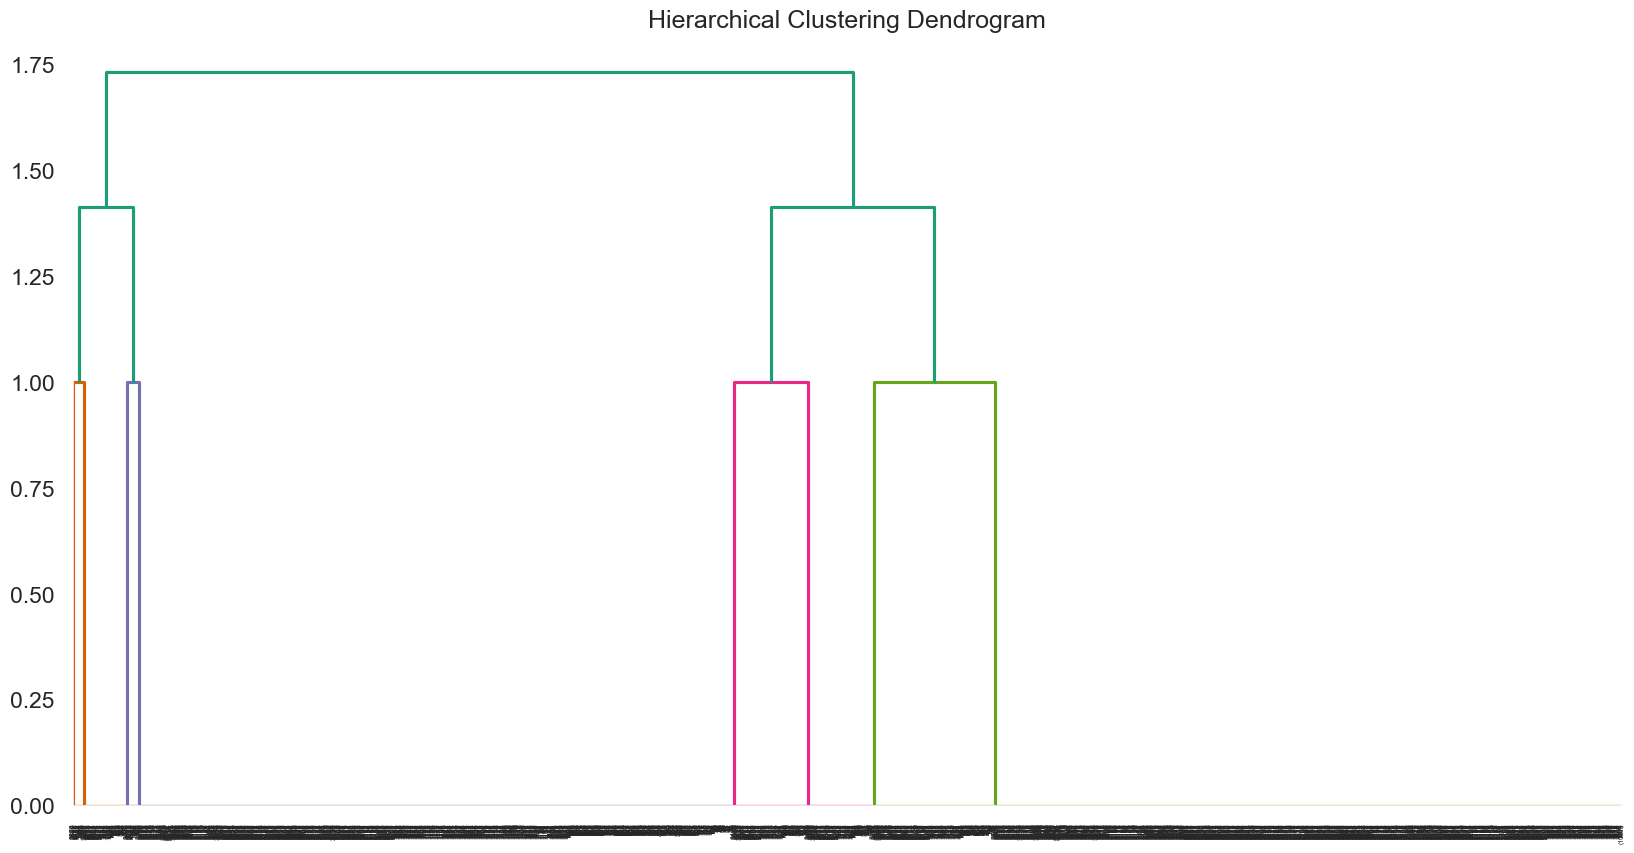

In [60]:
plot_dendrogram(success_no, 'complete')

In [61]:
success['no_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(success_no)

In [62]:
groupby_mean(success, 'no_complete2')

no_complete2,0,1
Course area_Art,0.063008,0.076046
Course area_Business sciences,0.222764,0.162548
Course area_Engineering and related techniques,0.038211,0.019011
Course area_Health,0.186992,0.288973
Course area_Information and journalism,0.071138,0.100760
Course area_Personal services,0.056504,0.061787
Course area_Social services,0.123577,0.172053
Course area_Teacher training/trainers and education sciences,0.051626,0.037072
Course area_Veterinary sciences,0.093089,0.054183
Marital status,0.877236,0.939163


##### Ward

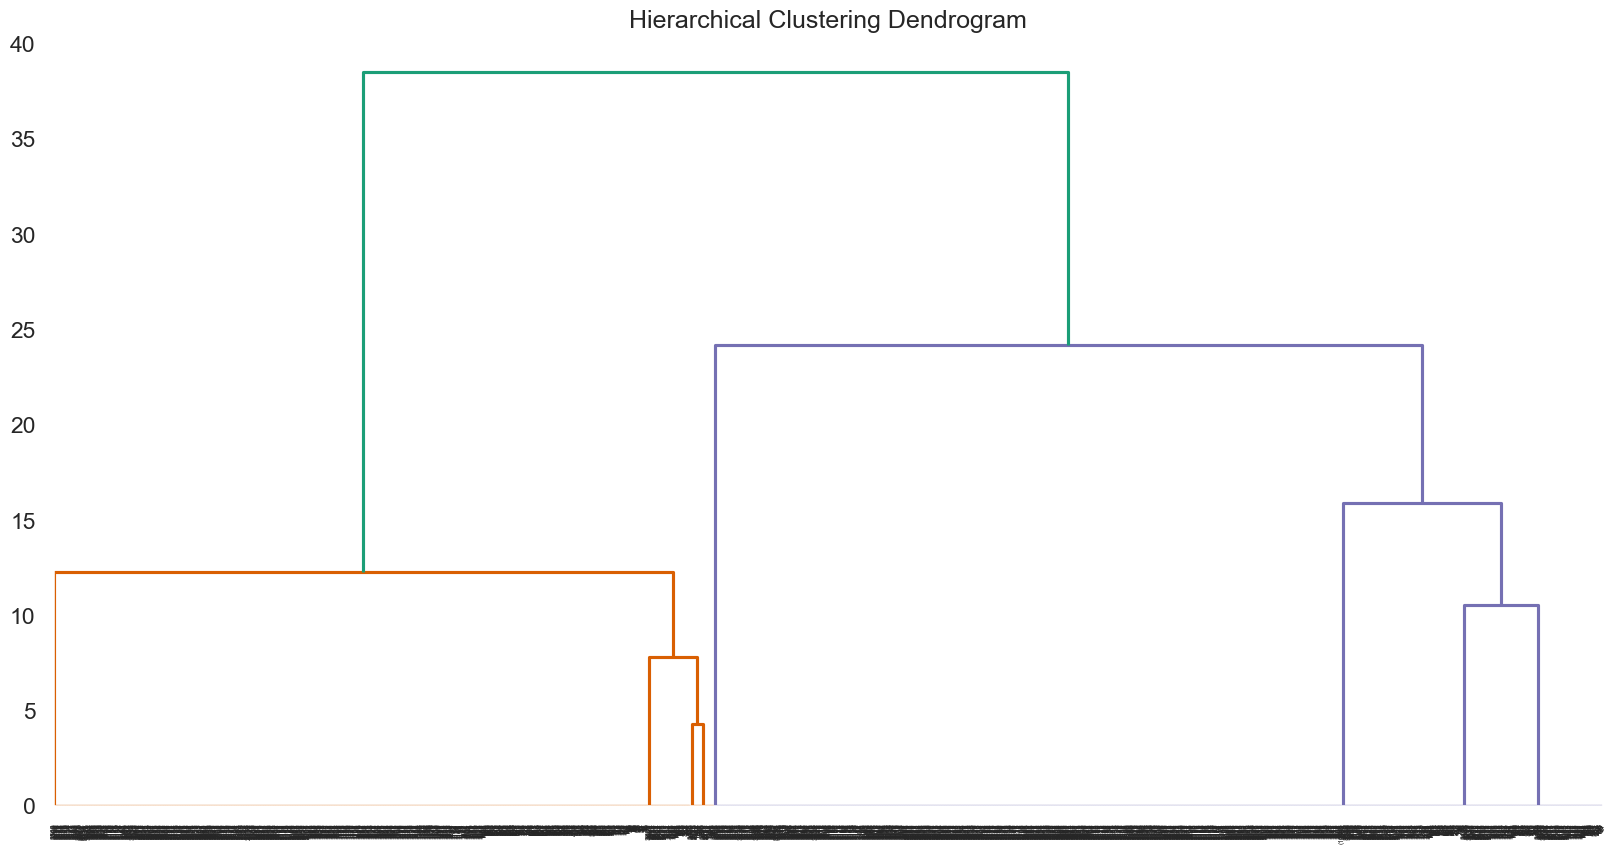

In [63]:
plot_dendrogram(success_no, 'ward')

In [64]:
success['no_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(success_no)

In [65]:
clusters_comparison(success, 'no_complete2', 'no_ward2')

,no_ward2 0 Cluster,no_ward2 1 Cluster
no_complete2 0 Cluster,2460,0
no_complete2 1 Cluster,0,1052


#### Average

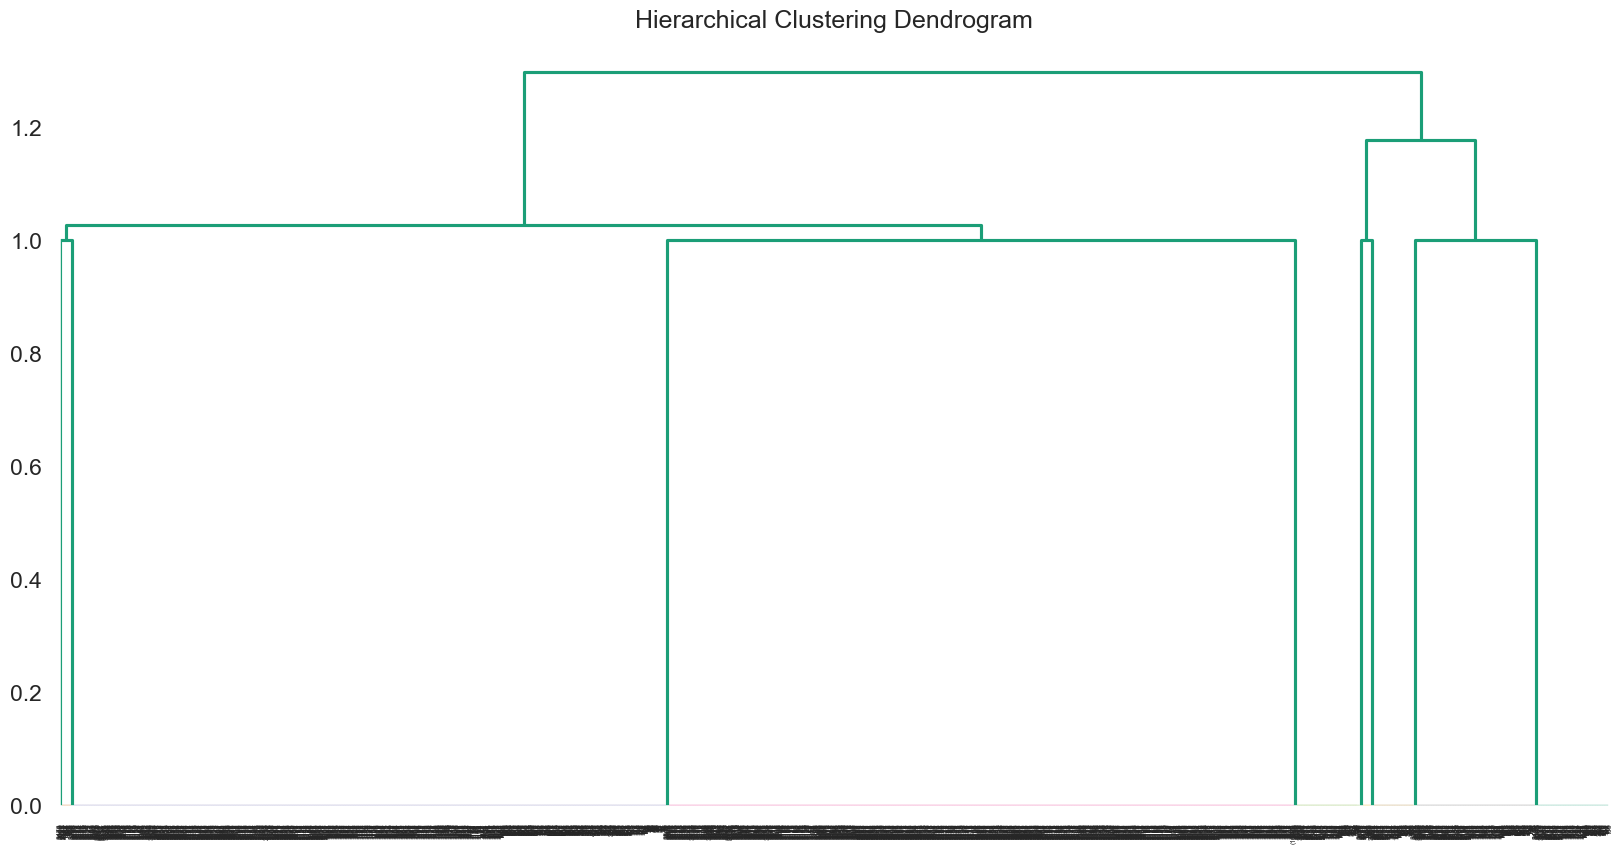

In [66]:
plot_dendrogram(success_no, 'average')

In [67]:
success['no_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(success_no)

In [68]:
clusters_comparison(success, 'no_ward2', 'no_average2')

,no_average2 0 Cluster,no_average2 1 Cluster
no_ward2 0 Cluster,311,2149
no_ward2 1 Cluster,86,966


In [69]:
groupby_mean(success, 'no_average2')

no_average2,0,1
Course area_Art,0.060453,0.067737
Course area_Business sciences,0.204030,0.204815
Course area_Engineering and related techniques,0.057935,0.029213
Course area_Health,0.093199,0.233387
Course area_Information and journalism,0.105793,0.076726
Course area_Personal services,0.032746,0.061316
Course area_Social services,0.161209,0.135152
Course area_Teacher training/trainers and education sciences,0.068010,0.044623
Course area_Veterinary sciences,0.078086,0.081862
Marital status,0.869018,0.899197


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


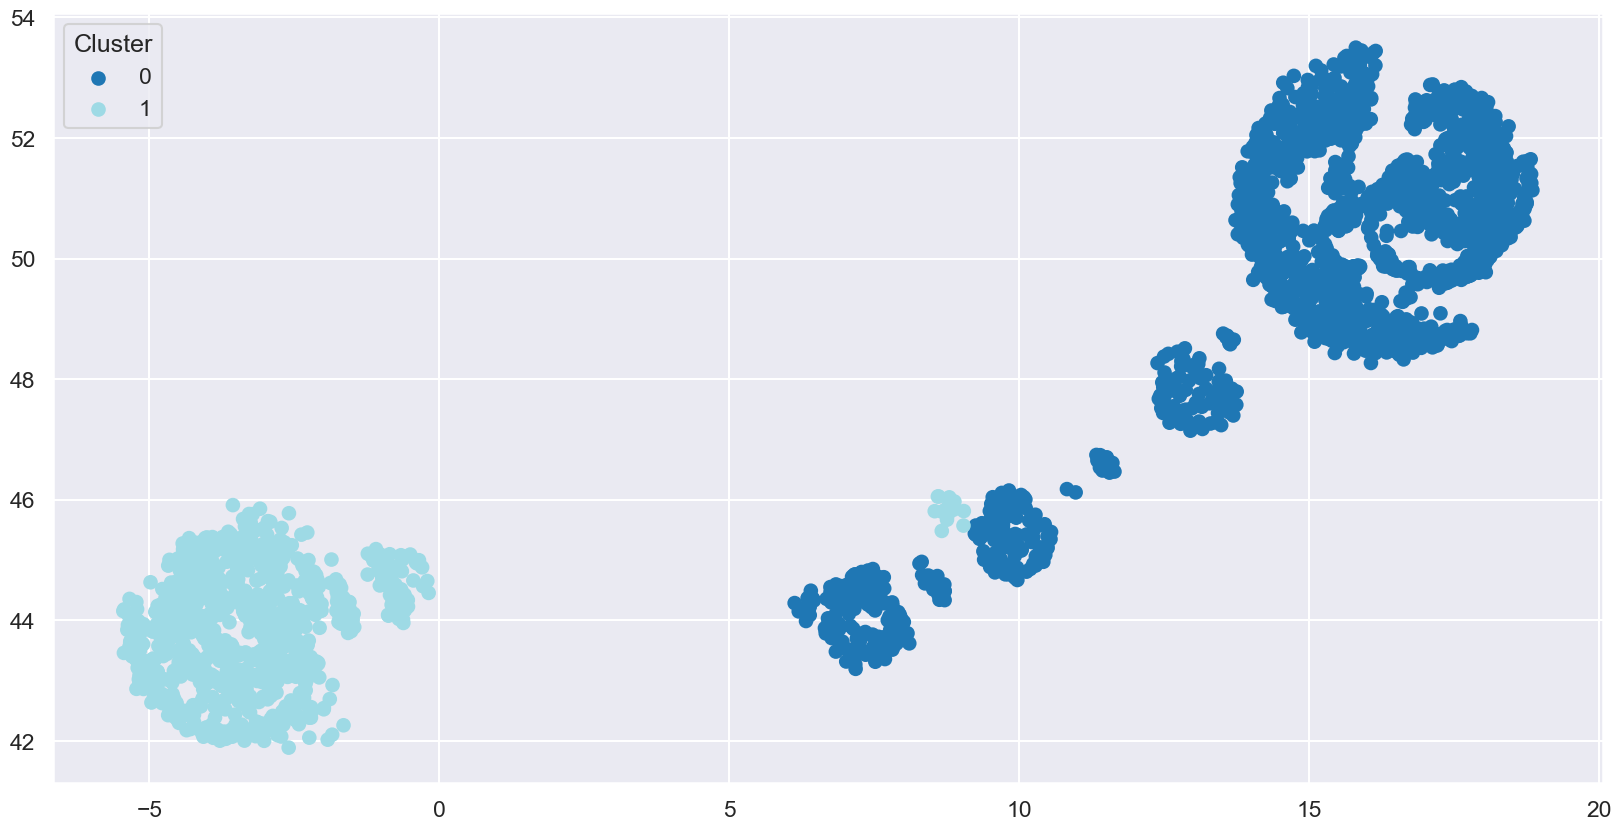

In [82]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(success_no)
visualize_dimensionality_reduction(umap_embedding, success['no_ward2'])

#### Robust

In [83]:
success_rb = success_rb[financial_cols]

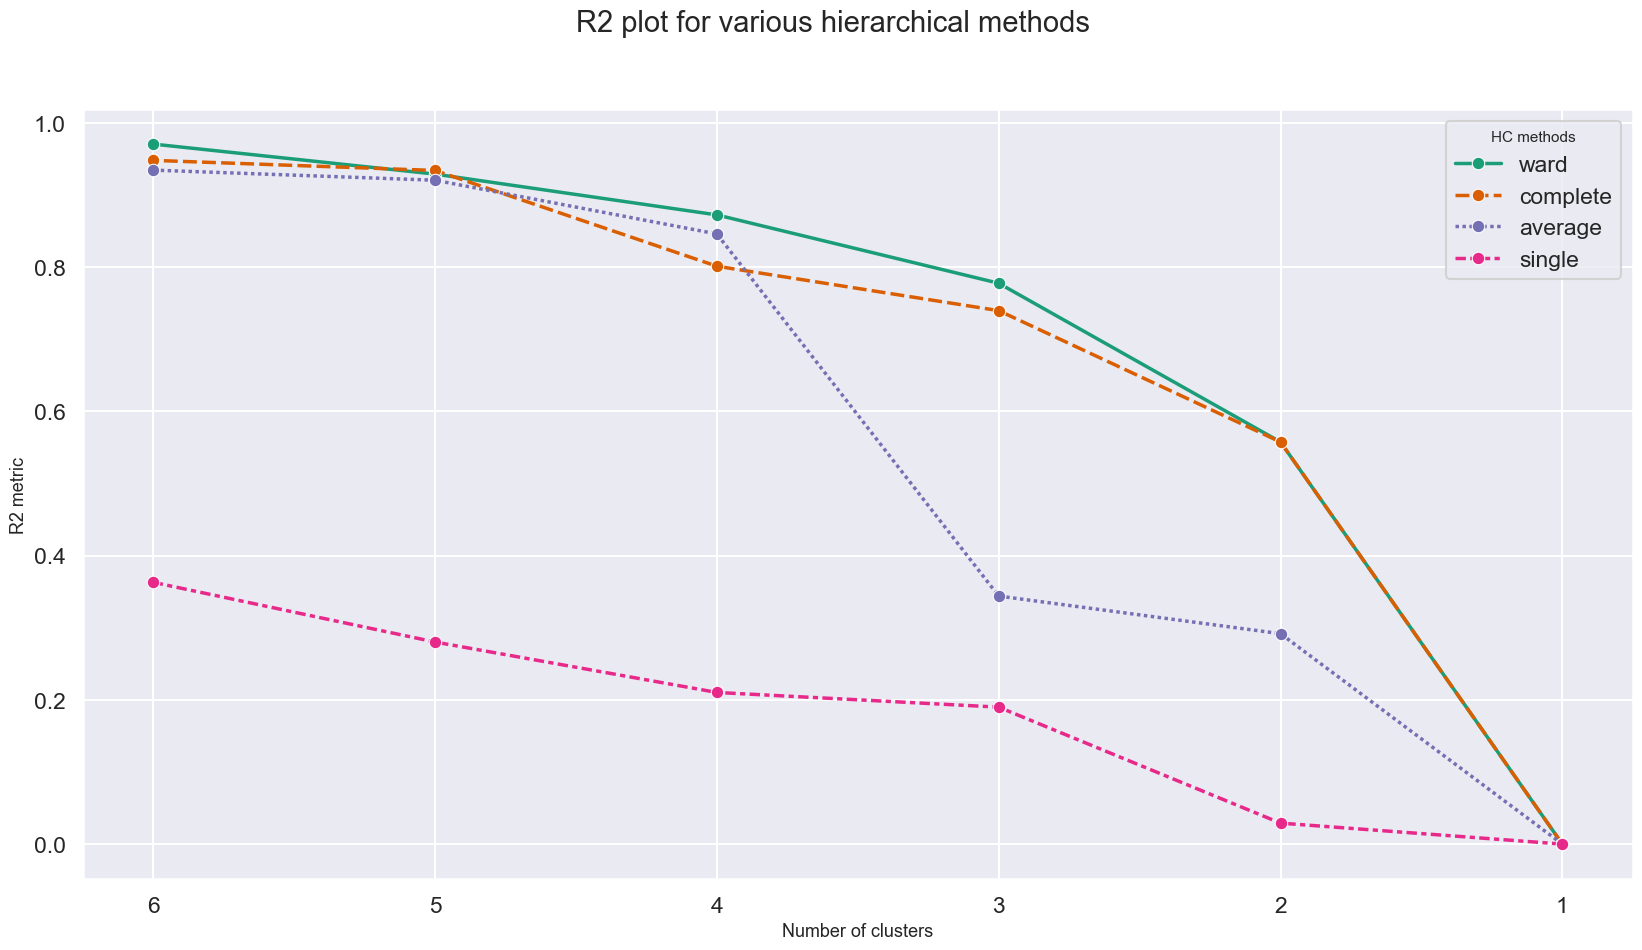

In [84]:
plot_r2_hc(success_rb)

##### Complete

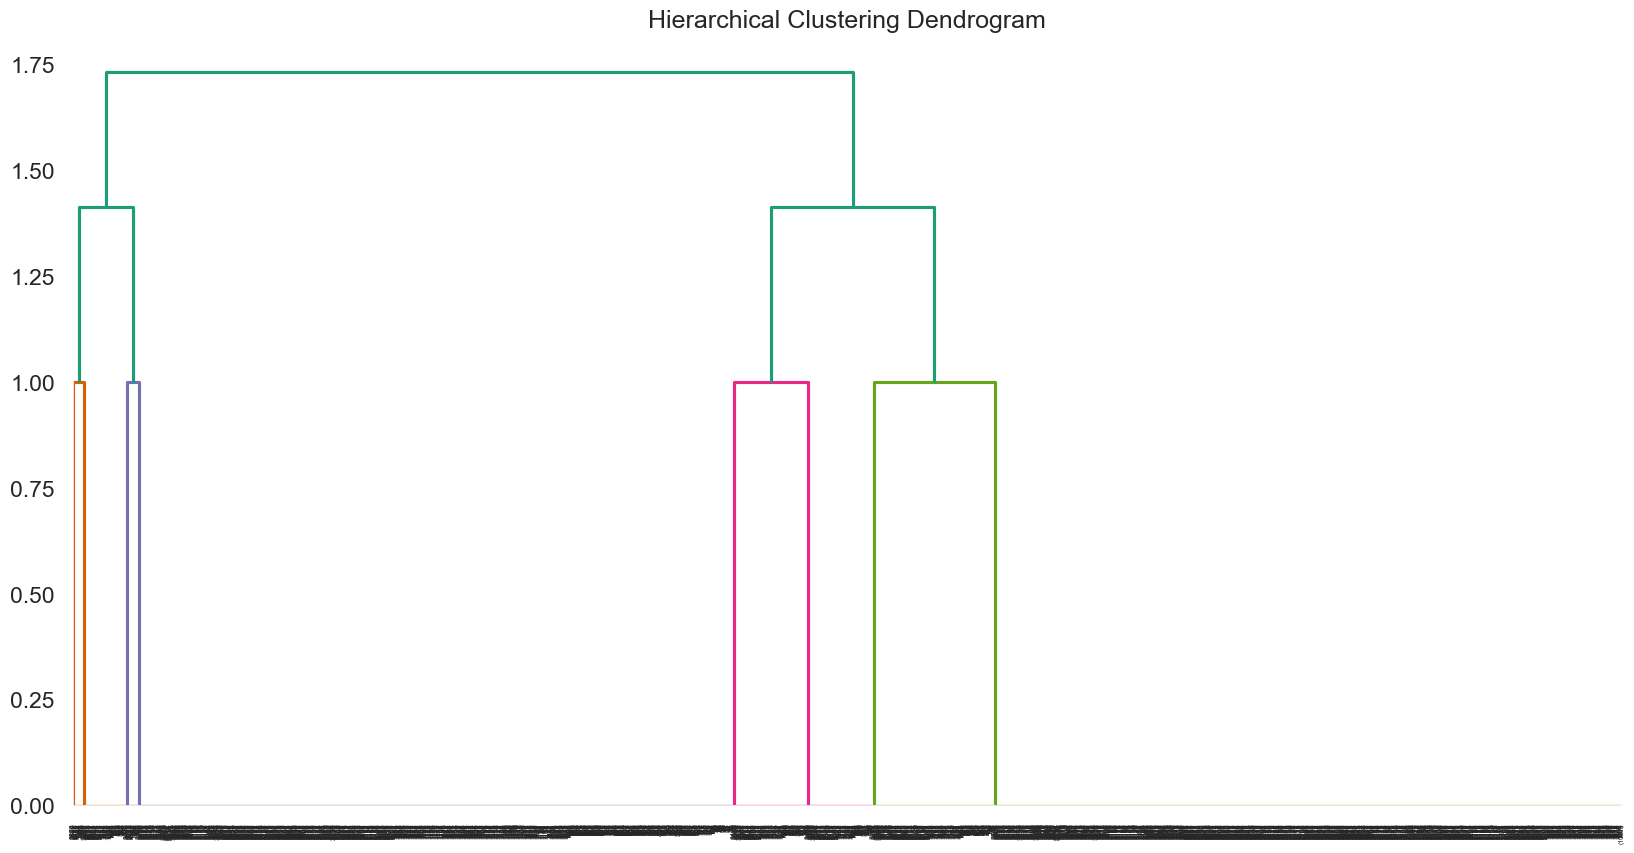

In [85]:
plot_dendrogram(success_rb, 'complete')

In [86]:
success['rb_complete2'] = AgglomerativeClustering(
    linkage='complete', n_clusters=2
    ).fit_predict(success_rb)

In [87]:
clusters_comparison(success, 'no_complete2', 'rb_complete2')

,rb_complete2 0 Cluster,rb_complete2 1 Cluster
no_complete2 0 Cluster,2460,0
no_complete2 1 Cluster,0,1052


##### Ward

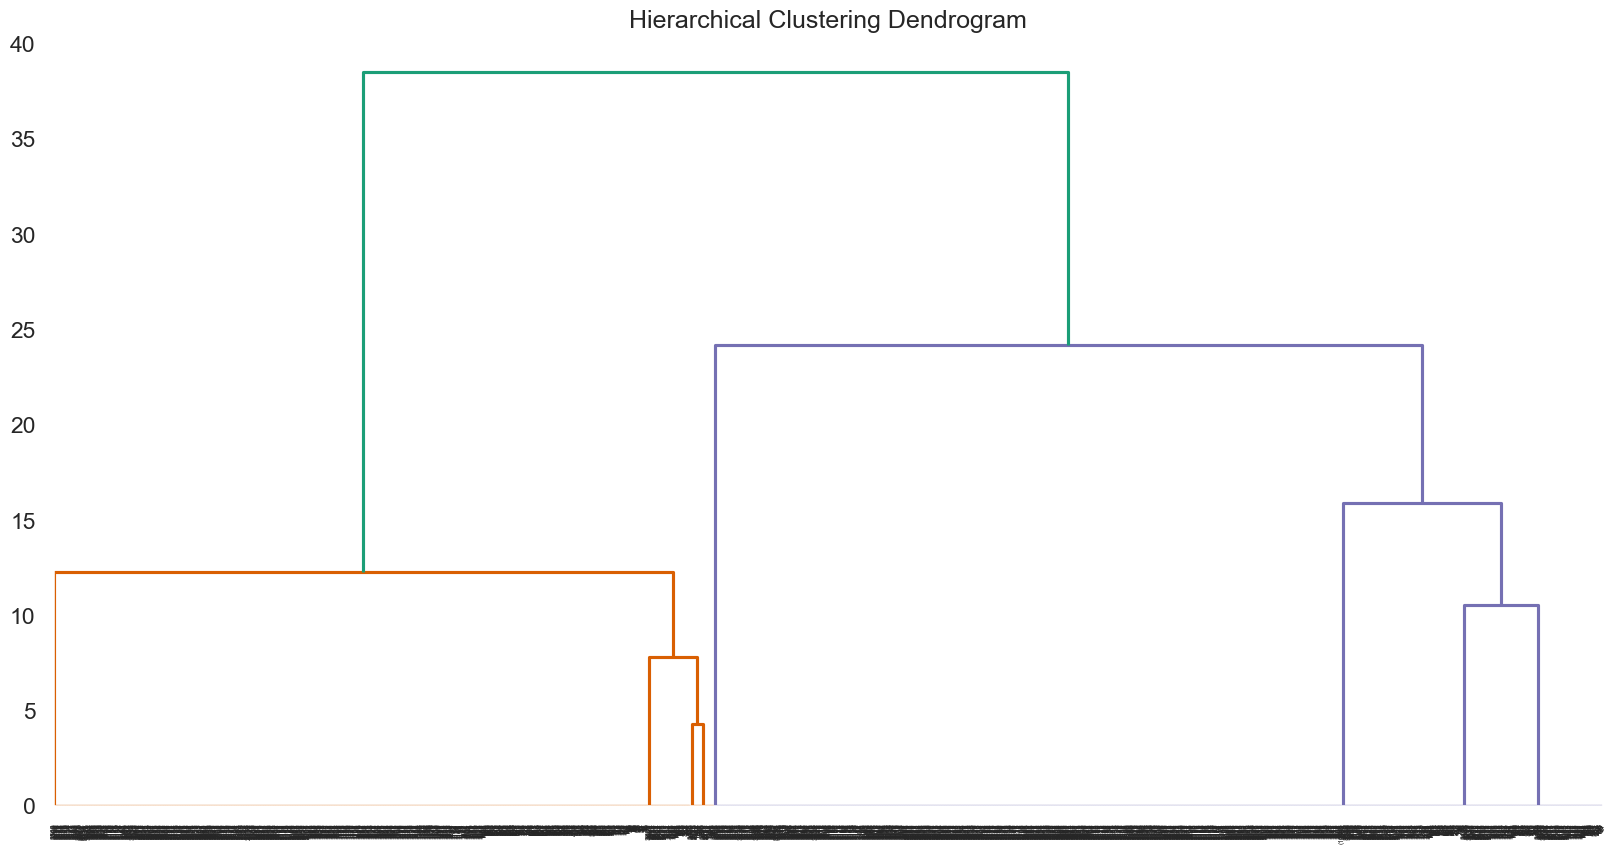

In [88]:
plot_dendrogram(success_rb, 'ward')

In [89]:
success['rb_ward2'] = AgglomerativeClustering(
    linkage='ward', n_clusters=2
    ).fit_predict(success_rb)

In [90]:
clusters_comparison(success, 'no_ward2', 'rb_ward2')

,rb_ward2 0 Cluster,rb_ward2 1 Cluster
no_ward2 0 Cluster,2460,0
no_ward2 1 Cluster,0,1052


##### Average

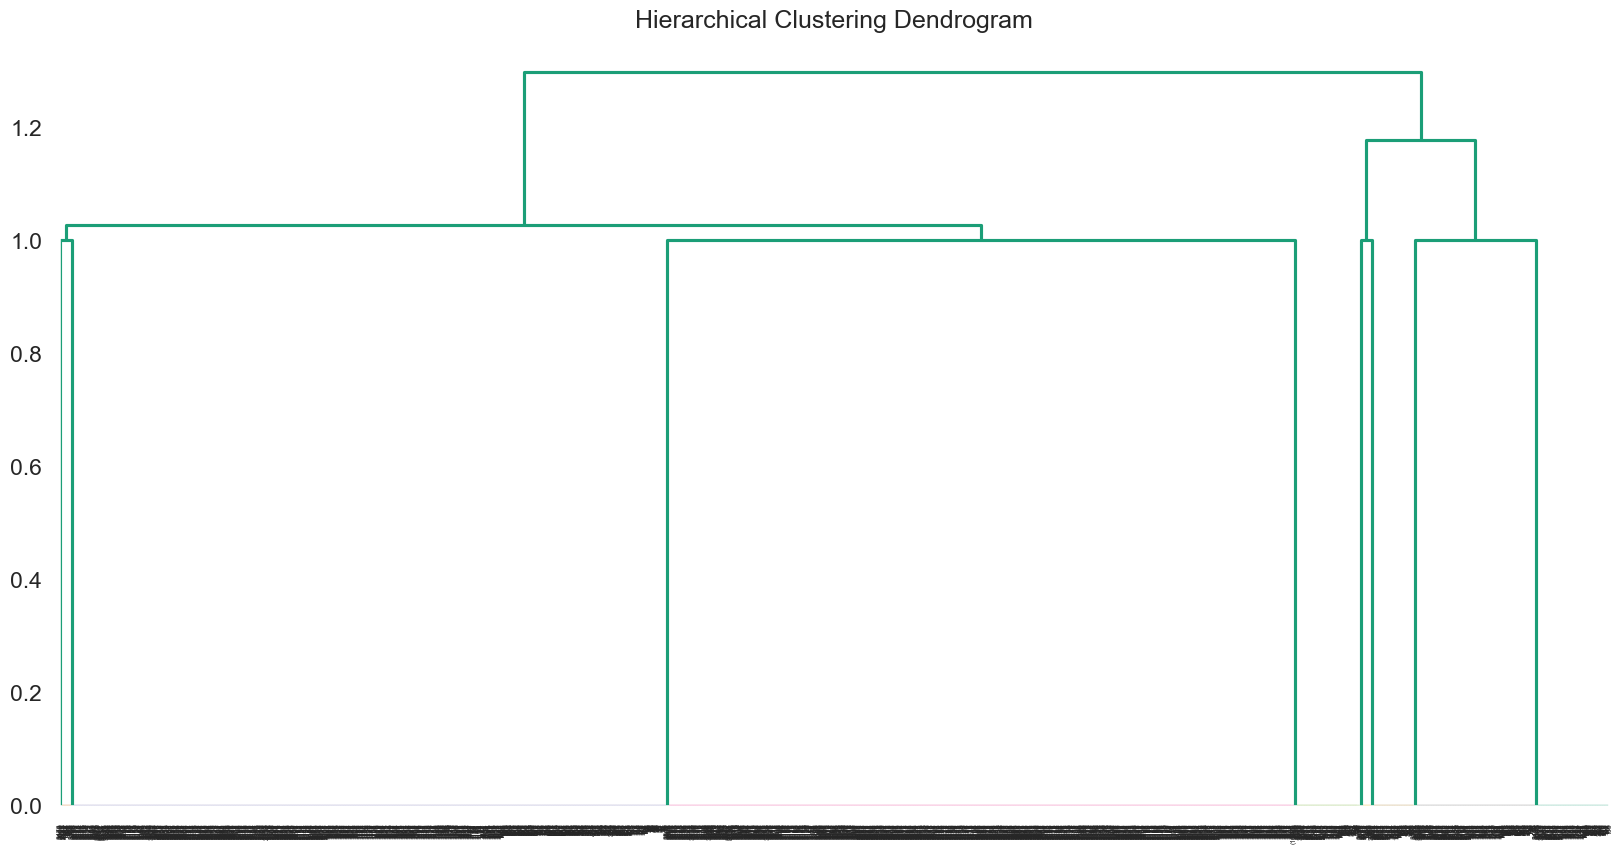

In [91]:
plot_dendrogram(success_rb, 'average')

In [92]:
success['rb_average2'] = AgglomerativeClustering(
    linkage='average', n_clusters=2
    ).fit_predict(success_rb)

In [93]:
clusters_comparison(success, 'no_average2', 'rb_average2')

,rb_average2 0 Cluster,rb_average2 1 Cluster
no_average2 0 Cluster,397,0
no_average2 1 Cluster,0,3115


##### UMAP

c:\Users\Afonso Cadete\anaconda3\envs\ml\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
g:\O meu disco\Universidade\3rd year\2nd semester\Machine Learning\II\Project\utils2.py:387: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handles = [plt.scatter([], [], c=cmap(norm(i)), label=label) for i, label in enumerate(labels)]


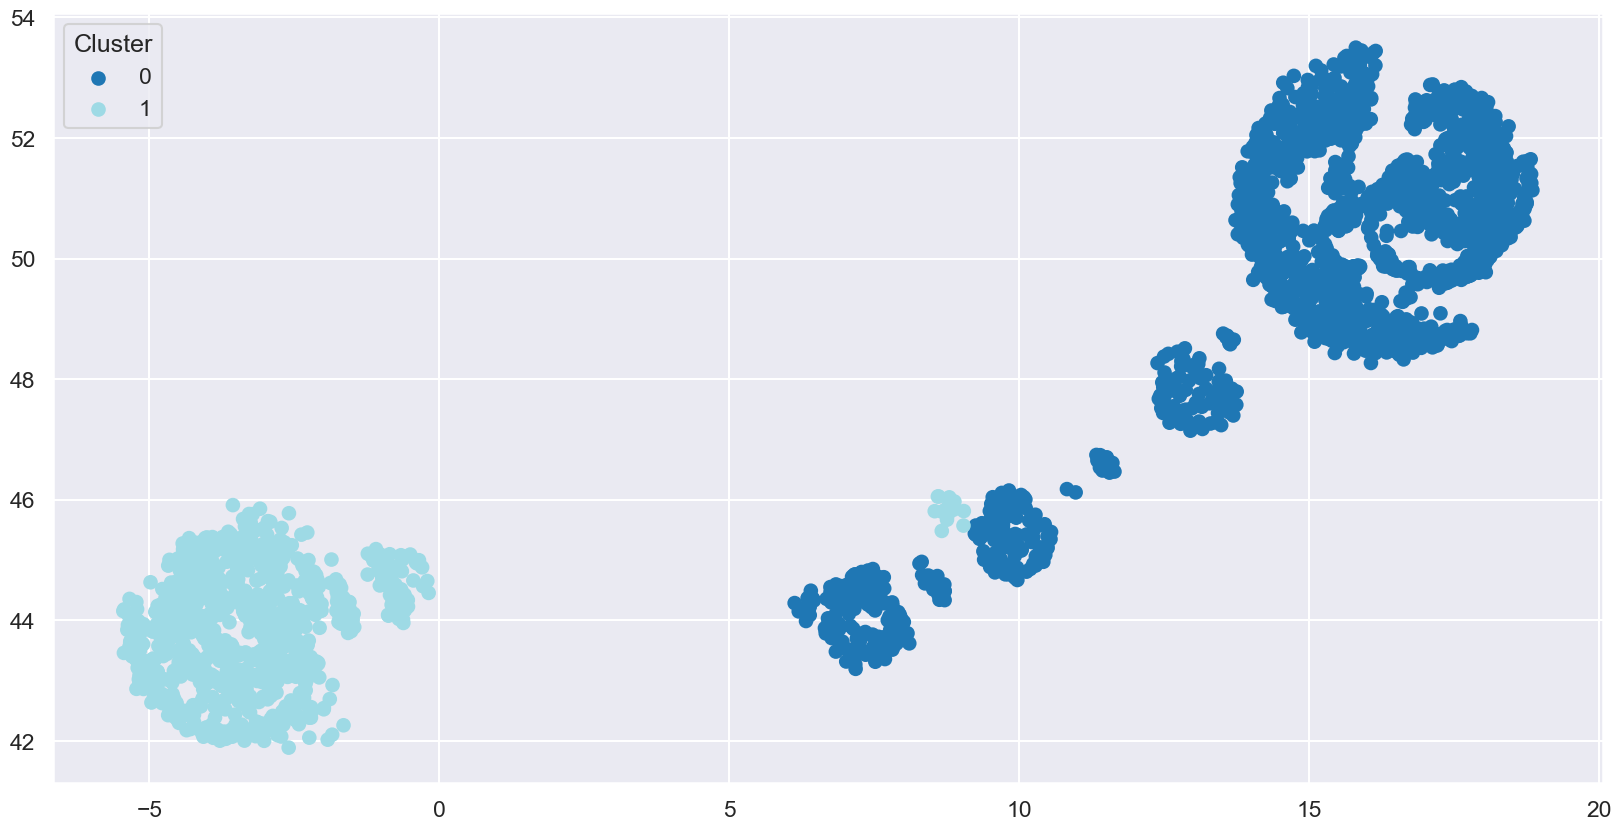

In [94]:
umap_object = umap.UMAP(n_neighbors=160, min_dist=1, random_state=16, n_jobs=-1)
umap_embedding = umap_object.fit_transform(success_rb)
visualize_dimensionality_reduction(umap_embedding, success['rb_ward2'])